Hello everyone,

In this project, it is required to analysis the key indicators of heart disease.
We will work with the [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease).

At first, what are the main steps we should go through in this project?

# TODOs:

1. Understand the problem (look at the big picture)
2. Get the data
3. Analysis and Visualization


# 1. Understand the problem

- Heart disease is one of the leading causes of death for people.
- Key indicators for heart disease can include `blood pressure`, `high cholesterol`, `smoking`, `diabetic status`, `obesity (high BMI)`, `not getting enough physical activity` or `drinking too much alcohol`.
- Detecting the factors that have the **greatest impact** on heart disease is very important in healthcare, Which is our main goal in this notebook.

In [1]:
##################################################### imports #####################################################
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

# 2. Get the data

In [2]:
df = pd.read_csv('./data/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.shape

(319795, 18)

The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals). In machine learning projects, "HeartDisease" can be used as the explonatory variable, but note that the classes are heavily unbalanced.

| Column          | Description                                                                                                                                                                    |
|-----------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| __`HeartDisease`__    | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)                                                                          |
| `BMI`             | Body Mass Index (BMI)                                                                                                                                                          |
| `Smoking`         | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]                                                                                  |
| `AlcoholDrinking` | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week                                                               |
| `Stroke`          | (Ever told) (you had) a stroke?                                                                                                                                                |
| `PhysicalHealth`  | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)  |
| `MentalHealth`    | Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)                                                      |
| `DiffWalking`     | Do you have serious difficulty walking or climbing stairs?                                                                                                                     |
| `Sex`             | Are you male or female?                                                                                                                                                        |
| `AgeCategory`     | Fourteen-level age category                                                                                                                                                    |
| `Race`            | Imputed race/ethnicity value
| `Diabetic`        | (Ever told) (you had) diabetes?
| `PhysicalActivity`| Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
| `GenHealth`       | Would you say that in general your health is...
| `SleepTime`       | On average, how many hours of sleep do you get in a 24-hour period?
| `Asthma`          | (Ever told) (you had) asthma?
| `KidneyDisease`   | Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
| `SkinCancer`      | (Ever told) (you had) skin cancer?


# 3. Analysis and Visualization

In [4]:
yes_count, no_count, total_size = len(df[df['HeartDisease']=='Yes']), len(df[df['HeartDisease']=='No']), len(df)
print(f'total data samples: {total_size} ({total_size/total_size * 100}%)')
print(f'yes samples: {yes_count} ({round(yes_count/total_size, 1) * 100}%)')
print(f'no samples: {no_count} ({round(no_count/total_size, 1) * 100}%)')
print(f'Data is free of missing values: {"❌" if df.isna().all().all() else "✔"}')

total data samples: 319795 (100.0%)
yes samples: 27373 (10.0%)
no samples: 292422 (90.0%)
Data is free of missing values: ✔


## 3.1 Analyze Categorical Key indicators

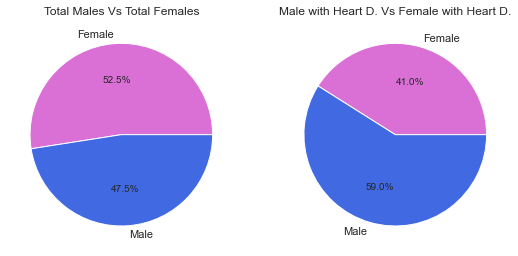

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2)
colors = ['orchid', 'royalblue']

df['Sex'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Males Vs Total Females', colors=colors, ylabel="")
df[df['HeartDisease']=='Yes']['Sex'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='Male with Heart D. Vs Female with Heart D.', colors=colors, ylabel="")
plt.show()

> males are more prone to heart disease.

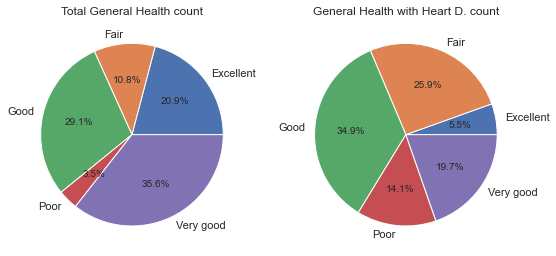

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['GenHealth'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total General Health count', ylabel="")
df[df['HeartDisease']=='Yes']['GenHealth'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='General Health with Heart D. count', ylabel="")
plt.show()

> There is obvious negative correlation between general health and heart disease.

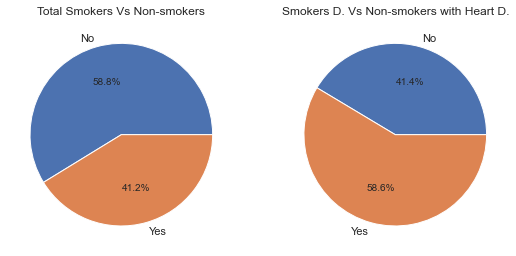

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['Smoking'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Smokers Vs Non-smokers', ylabel="")
df[df['HeartDisease']=='Yes']['Smoking'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='Smokers D. Vs Non-smokers with Heart D.', ylabel="")
plt.show()

> There is a correlation between smoking and heart disease.

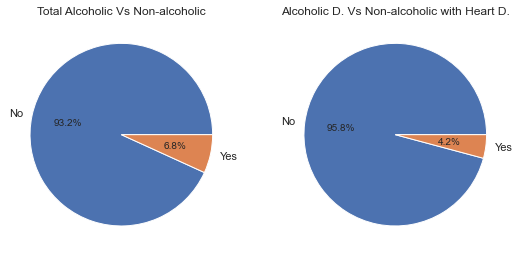

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['AlcoholDrinking'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Alcoholic Vs Non-alcoholic', ylabel="")
df[df['HeartDisease']=='Yes']['AlcoholDrinking'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='Alcoholic D. Vs Non-alcoholic with Heart D.', ylabel="")
plt.show()

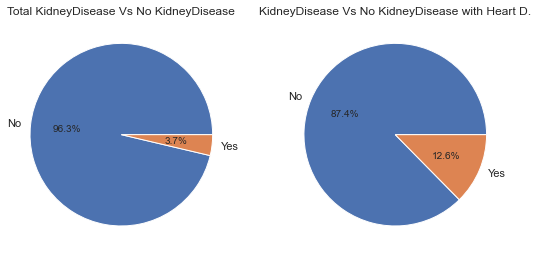

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['KidneyDisease'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total KidneyDisease Vs No KidneyDisease', ylabel="")
df[df['HeartDisease']=='Yes']['KidneyDisease'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='KidneyDisease Vs No KidneyDisease with Heart D.', ylabel="")
plt.show()

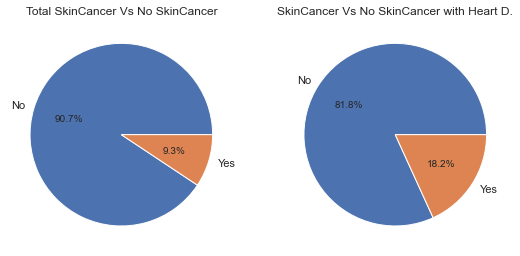

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['SkinCancer'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total SkinCancer Vs No SkinCancer', ylabel="")
df[df['HeartDisease']=='Yes']['SkinCancer'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='SkinCancer Vs No SkinCancer with Heart D.', ylabel="")
plt.show()

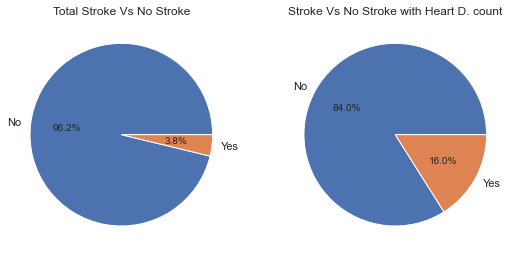

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['Stroke'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total Stroke Vs No Stroke', ylabel="")
df[df['HeartDisease']=='Yes']['Stroke'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='Stroke Vs No Stroke with Heart D. count', ylabel="")
plt.show()

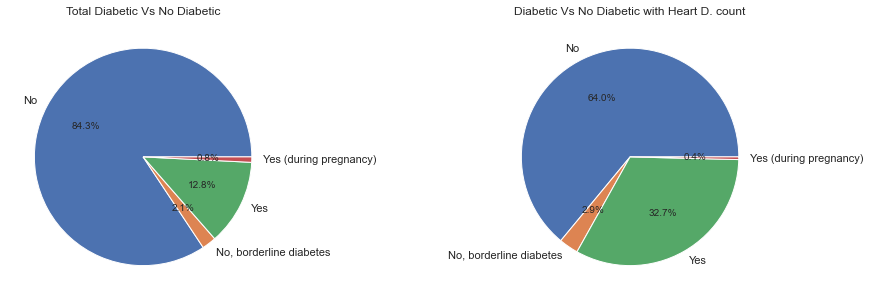

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['Diabetic'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(16, 5), autopct='%1.1f%%', title='Total Diabetic Vs No Diabetic', ylabel='')
df[df['HeartDisease']=='Yes']['Diabetic'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(16, 5), autopct='%1.1f%%', title='Diabetic Vs No Diabetic with Heart D. count', ylabel='')
plt.show()

In [13]:
print('Diabetic With HeartDisease:')
print(df[df['HeartDisease']=='Yes']['Diabetic'].value_counts())

print('---------------------------------')

print('Diabetic Without HeartDisease:')
print(df[df['HeartDisease']=='No']['Diabetic'].value_counts())

Diabetic With HeartDisease:
No                         17519
Yes                         8957
No, borderline diabetes      789
Yes (during pregnancy)       108
Name: Diabetic, dtype: int64
---------------------------------
Diabetic Without HeartDisease:
No                         252134
Yes                         31845
No, borderline diabetes      5992
Yes (during pregnancy)       2451
Name: Diabetic, dtype: int64


> Diabetic values can encoded in levels, i.e. No: 0, Yes: 3...

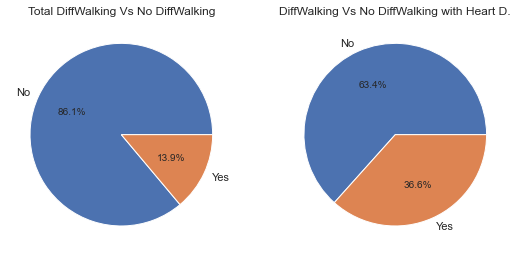

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['DiffWalking'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total DiffWalking Vs No DiffWalking', ylabel='')
df[df['HeartDisease']=='Yes']['DiffWalking'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='DiffWalking Vs No DiffWalking with Heart D.', ylabel='')
plt.show()

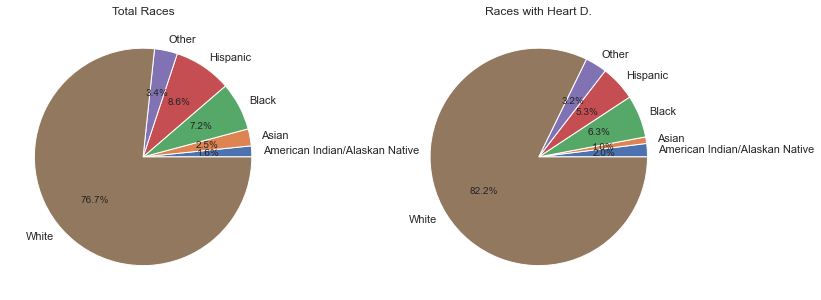

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['Race'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(13, 5), autopct='%1.1f%%', title='Total Races', ylabel='')
df[df['HeartDisease']=='Yes']['Race'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(13, 5), autopct='%1.1f%%', title='Races with Heart D.', ylabel='')
plt.show()

> Races appear as an insignificant feature regarding heart disease, most probable we will exclude it in the classification phase.

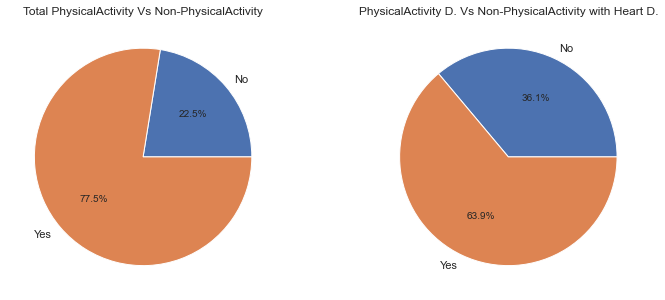

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['PhysicalActivity'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(12, 5), autopct='%1.1f%%', title='Total PhysicalActivity Vs Non-PhysicalActivity', ylabel='')
df[df['HeartDisease']=='Yes']['PhysicalActivity'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(12, 5), autopct='%1.1f%%', title='PhysicalActivity D. Vs Non-PhysicalActivity with Heart D.', ylabel='')
plt.show()

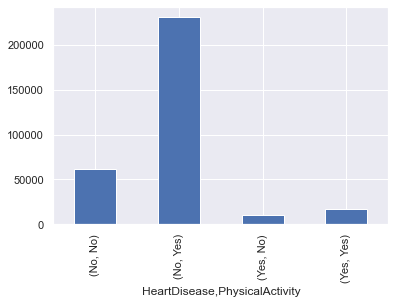

In [17]:
df.groupby(['HeartDisease', 'PhysicalActivity']).size().plot(kind='bar')
plt.show()

## 3.1 Analyze Continous Key indicators

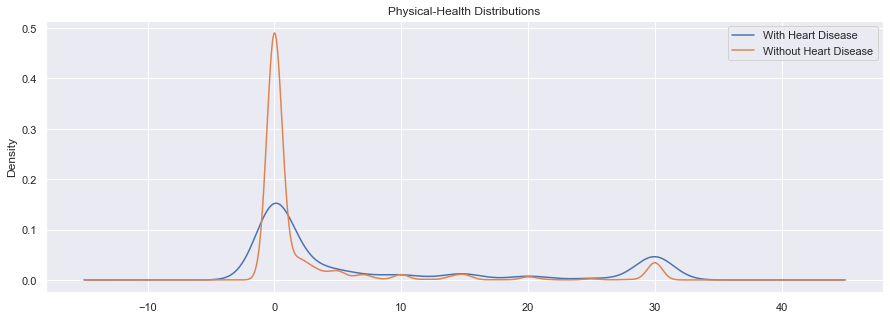

In [18]:
physical_with_heart_disease = df[df['HeartDisease']=='Yes']['PhysicalHealth'].rename("With Heart Disease", inplace=False)
physical_without_heart_disease = df[df['HeartDisease']=='No']['PhysicalHealth'].rename("Without Heart Disease", inplace=False)

physical_with_heart_disease.plot(kind='kde', figsize=(15, 5))
physical_without_heart_disease.plot(kind='kde', figsize=(15, 5))
plt.title("Physical-Health Distributions")
plt.legend()
plt.show()

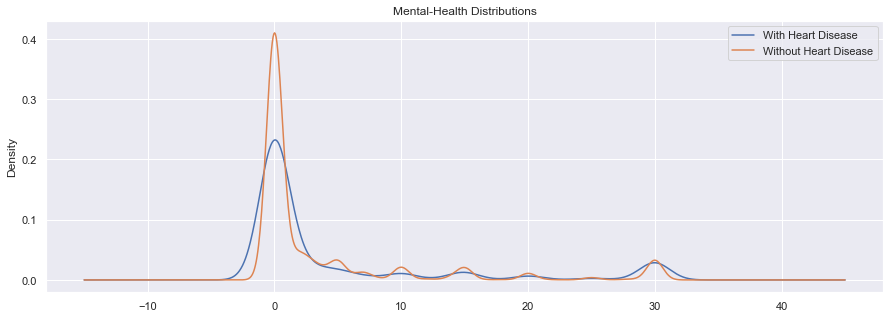

In [19]:
mental_with_heart_disease = df[df['HeartDisease']=='Yes']['MentalHealth'].rename("With Heart Disease", inplace=False)
mental_without_heart_disease = df[df['HeartDisease']=='No']['MentalHealth'].rename("Without Heart Disease", inplace=False)

mental_with_heart_disease.plot(kind='kde', figsize=(15, 5))
mental_without_heart_disease.plot(kind='kde', figsize=(15, 5))
plt.title("Mental-Health Distributions")
plt.legend()
plt.show()

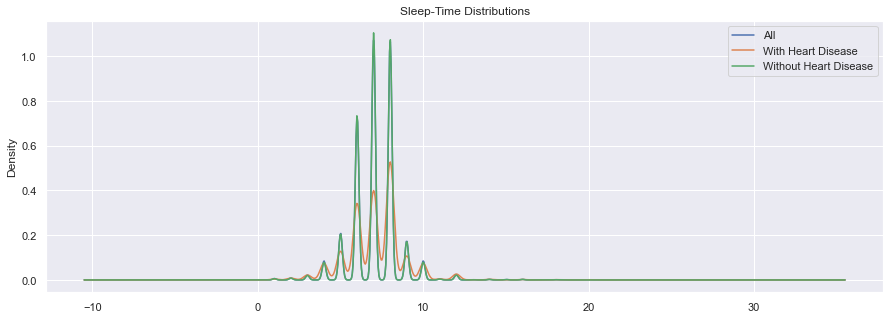

In [20]:
all_sleep = df['SleepTime'].rename("All", inplace=False)
sleep_with_heart_disease = df[df['HeartDisease']=='Yes']['SleepTime'].rename("With Heart Disease", inplace=False)
sleep_without_heart_disease = df[df['HeartDisease']=='No']['SleepTime'].rename("Without Heart Disease", inplace=False)

all_sleep.plot(kind='kde', figsize=(15, 5))
sleep_with_heart_disease.plot(kind='kde', figsize=(15, 5))
sleep_without_heart_disease.plot(kind='kde', figsize=(15, 5))
plt.title("Sleep-Time Distributions")
plt.legend()
plt.show()

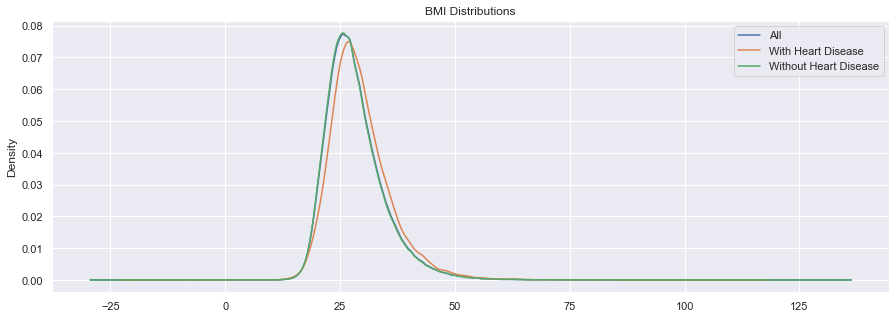

In [21]:
all_bmi = df['BMI'].rename("All", inplace=False)
bmi_with_heart_disease = df[df['HeartDisease']=='Yes']['BMI'].rename("With Heart Disease", inplace=False)
bmi_without_heart_disease = df[df['HeartDisease']=='No']['BMI'].rename("Without Heart Disease", inplace=False)

all_bmi.plot(kind='kde', figsize=(15, 5))
bmi_with_heart_disease.plot(kind='kde', figsize=(15, 5))
bmi_without_heart_disease.plot(kind='kde', figsize=(15, 5))
plt.title("BMI Distributions")
plt.legend()
plt.show()

Adult Body Mass Index or BMI
- BMI is less than 18.5, it falls within the underweight range.
- BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range.
- BMI is 25.0 to 29.9, it falls within the overweight range.
- BMI is 30.0 or higher, it falls within the obese range.

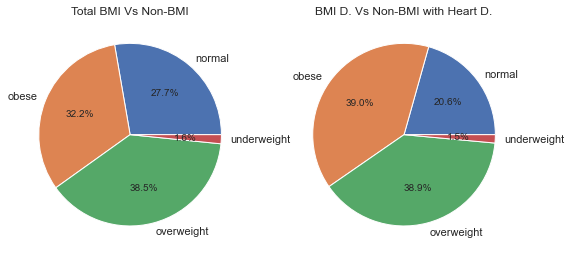

In [22]:
def BMIContinousToCategory(bmi):
    if bmi < 18.5:
        return "underweight"
    elif bmi < 24.5:
        return "normal"
    elif bmi < 30:
        return "overweight"
    else:
        return "obese"
df['BMICategory'] = df['BMI'].apply(BMIContinousToCategory)

fig, axes = plt.subplots(nrows=1, ncols=2)

df['BMICategory'].value_counts().sort_index().plot(kind='pie', ax=axes[0], figsize=(9, 5), autopct='%1.1f%%', title='Total BMI Vs Non-BMI', ylabel='')
df[df['HeartDisease']=='Yes']['BMICategory'].value_counts().sort_index().plot(kind='pie', ax=axes[1], figsize=(9, 5), autopct='%1.1f%%', title='BMI D. Vs Non-BMI with Heart D.', ylabel='')
plt.show()

Convert Age from Categorical to Continous

In [23]:
from statistics import mean
AgeCategoryToContinous = lambda age : round(mean(map(int, age.split(' ')[0].split('-'))))
df['Age'] = df['AgeCategory'].apply(AgeCategoryToContinous)
df.drop('AgeCategory', axis=1, inplace=True)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICategory,Age
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,White,Yes,Yes,Very good,5.0,Yes,No,Yes,underweight,57
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,White,No,Yes,Very good,7.0,No,No,No,normal,80
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,White,Yes,Yes,Fair,8.0,Yes,No,No,overweight,67
3,No,24.21,No,No,No,0.0,0.0,No,Female,White,No,No,Good,6.0,No,No,Yes,normal,77
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,White,No,Yes,Very good,8.0,No,No,No,normal,42


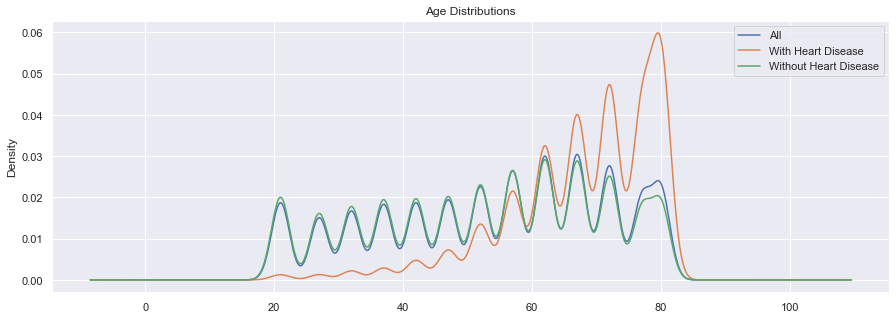

In [24]:
all_ages = df['Age'].rename("All", inplace=False)
ages_with_heart_disease = df[df['HeartDisease']=='Yes']['Age'].rename("With Heart Disease", inplace=False)
ages_without_heart_disease = df[df['HeartDisease']=='No']['Age'].rename("Without Heart Disease", inplace=False)

all_ages.plot(kind='kde', figsize=(15,5))
ages_with_heart_disease.plot(kind='kde', figsize=(15, 5))
ages_without_heart_disease.plot(kind='kde', figsize=(15, 5))
plt.title("Age Distributions")
plt.legend()
plt.show()

> Old people are more prone to Heart Disease.

##### Correlation heatmap between the continuous key indicators

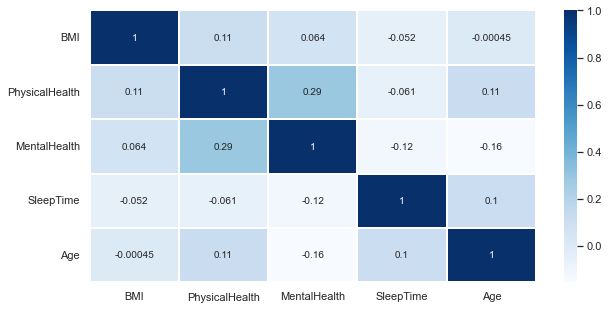

In [25]:
corr = df.corr()
plt.figure(figsize = (10,5))
sns.heatmap(corr, cmap="Blues", annot=True, linewidths=2)
plt.show()

# 4. Preprocessing

In [26]:
def preprocessing(data):
    encoded = data.copy()
    
    # encode Diabetic categories
    diabetic_dict = {
        'No': 0,
        'Yes (during pregnancy)': 1,
        'No, borderline diabetes': 2,
        'Yes': 3
        }

    encoded['Diabetic'].replace(diabetic_dict, inplace=True)

    # encode GenHealth categories
    gen_dict = {
        'Poor': 0,
        'Fair': 1,
        'Good': 2,
        'Very good': 3,
        'Excellent': 4
        }

    encoded['GenHealth'].replace(gen_dict, inplace=True)

    columns = data.columns

    # drop race
    if 'Race' in columns:
        encoded.drop('Race', axis=1, inplace=True)

    # make age continous
    if 'AgeCategory' in columns:
        AgeCategoryToContinous = lambda age : round(mean(map(int, age.split(' ')[0].split('-'))))
        encoded['Age'] = encoded['AgeCategory'].apply(AgeCategoryToContinous)
        encoded.drop('AgeCategory', axis=1, inplace=True)
        encoded.head()

    # encode binary data
    encoded['Sex'].replace({'Female':1, 'Male':0}, inplace=True)
    binary_categories = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
    for category in binary_categories:
        encoded[category].replace({'Yes':1, 'No':0}, inplace=True)

    # encode labels (Y) if exists
    if 'HeartDisease' in columns:
        encoded['HeartDisease'].replace({'Yes':1, 'No':0}, inplace=True)

    if 'BMICategory' in columns:
        encoded.drop('BMICategory', axis=1, inplace=True)

    return encoded

In [27]:
encoded_df = preprocessing(df)
encoded_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age
0,0,16.60,1,0,0,3.0,30.0,0,1,3,1,3,5.0,1,0,1,57
1,0,20.34,0,0,1,0.0,0.0,0,1,0,1,3,7.0,0,0,0,80
2,0,26.58,1,0,0,20.0,30.0,0,0,3,1,1,8.0,1,0,0,67
3,0,24.21,0,0,0,0.0,0.0,0,1,0,0,2,6.0,0,0,1,77
4,0,23.71,0,0,0,28.0,0.0,1,1,0,1,3,8.0,0,0,0,42


# 5. Training

## 5.1 Spliting Data

In [28]:
from sklearn.model_selection import train_test_split

labels = encoded_df['HeartDisease']
encoded_df.drop('HeartDisease', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(encoded_df, labels, test_size=0.3, random_state=42)



## 5.2 Sampling Data

Since data is __unbalanced__, we will make oversampling for the small class and undersampling for the large class.
So that we reach a less biased dataset.
> We will do this operation for both, training and test data.

In [29]:
def sampling(X, y):
    X['y'] = y

    class_0 = X[X['y'] == 0]
    class_1 = X[X['y'] == 1]

    # undersampling
    under_sample_size = int(len(class_0) / 1.5)
    class_0 = class_0.sample(under_sample_size,replace=False)
    print('undersample size', under_sample_size)
    # oversampling
    over_sample_size = int(len(class_1) * 3)
    class_1 = class_1.sample(over_sample_size,replace=True)
    print('oversample size', over_sample_size)

    X = pd.concat([class_0, class_1], axis=0)
    
    y = X['y']
    X = X.drop('y', axis=1)

    return X, y


In [30]:
print('Sampled Training Data:')
X_train, y_train = sampling(X_train, y_train)
print('\nSampled Testing Data:')
X_test, y_test = sampling(X_test, y_test)


Sampled Training Data:
undersample size 136515
oversample size 57249

Sampled Testing Data:
undersample size 58432
oversample size 24870


## 5.3 Testing sklearn Naive Bayes

In [31]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

sklearn_clf = GaussianNB()
sklearn_clf.fit(X_train, y_train)

GaussianNB()

In [32]:
print('SKlearn NB Accuracy on train data')
predicted_classes = sklearn_clf.predict(X_train)
pd.DataFrame(classification_report(y_train, predicted_classes, output_dict=True))


SKlearn NB Accuracy on train data


,0,1,accuracy,macro avg,weighted avg
precision,0.818569,0.600398,0.759192,0.709484,0.754109
recall,0.845636,0.553058,0.759192,0.699347,0.759192
f1-score,0.831883,0.575756,0.759192,0.703819,0.756208
support,136515.000000,57249.000000,0.759192,193764.000000,193764.000000


In [33]:
print('SKlearn NB Accuracy on test data')
predicted_classes = sklearn_clf.predict(X_test)
pd.DataFrame(classification_report(y_test, predicted_classes, output_dict=True))


SKlearn NB Accuracy on test data


,0,1,accuracy,macro avg,weighted avg
precision,0.811350,0.595037,0.752851,0.703194,0.746770
recall,0.843870,0.539003,0.752851,0.691436,0.752851
f1-score,0.827291,0.565636,0.752851,0.696463,0.749173
support,58432.000000,24870.000000,0.752851,83302.000000,83302.000000


## 5.4 Prepare Data for mapreduce model training

In [34]:
out = X_train.copy()
out.insert(0, 'y', y_train)
out.to_csv("Input/training_data.csv",header=False, index=False)

## 5.5 Read MapReduce Trained GaussianNB

In [35]:
import math
import json

class GaussianNB_CLF:

    def __init__(self, filename='model.txt'):
        self.read_model(filename)

    def read_model(self, filename='model.txt'):
        mean = [None, None]
        prob = [None, None]
        cov = [None, None]

        i = 0
        with open(filename) as f:
            for line in f:
                i += 1
                key = int(line[0])

                list = line.split("values=")[-1].strip()[:-1]
                list = json.loads(list)
                
                # read mean:
                if i < 3:
                    mean[key] = list
                # read covariance and probalities:
                else:
                    cov[key] = list[:-1]
                    prob[key] = list[-1]

        sum_prob = prob[0] + prob[1]
        prob[0], prob[1] = prob[0]/sum_prob, prob[1]/sum_prob

        number_of_features = len(mean[0])
        self.mean = np.array(mean)
        self.prob = np.array(prob)
        self.cov = np.zeros(shape=(2,number_of_features,number_of_features))

        k = 0
        for i in range(number_of_features):
            for j in range(i, number_of_features):
                for m in range(2):
                    self.cov[m][i][j] = cov[m][k]
                    self.cov[m][j][i] = cov[m][k]
                k+=1        

    def multivariate_normal_gaussian(self, X, mu, sigma):
        N = sigma.shape[0]
        const = ((2*math.pi)**(N/2)) * (np.linalg.det(sigma)**0.5)
        exp_term = np.dot((X-mu).T, np.linalg.inv(sigma))
        exp_term = np.dot(exp_term, X-mu)

        prob = np.exp(-0.5 * exp_term)/const
        
        return prob
    
    def predict_proba(self, X):

        proba = np.zeros(2)

        for i in range(len(proba)):
            proba[i] = self.prob[i] * self.multivariate_normal_gaussian(X, self.mean[i], self.cov[i])
        
        return proba/proba.sum()

    def predict(self, X):
        pred = []
        for point in X:
            proba = self.predict_proba(point)
            pred.append(proba.argmax())
        return pred

In [36]:
our_clf = GaussianNB_CLF('model.txt')

In [37]:
print('Our NB Accuracy on train data')
predicted_classes = our_clf.predict(X_train.values)
pd.DataFrame(classification_report(y_train, predicted_classes, output_dict=True))

Our NB Accuracy on train data


,0,1,accuracy,macro avg,weighted avg
precision,0.853980,0.551265,0.742352,0.702623,0.764541
recall,0.765132,0.688029,0.742352,0.726581,0.742352
f1-score,0.807118,0.612101,0.742352,0.709610,0.749499
support,136515.000000,57249.000000,0.742352,193764.000000,193764.000000


In [38]:
print('Our NB Accuracy on test data')
predicted_classes = our_clf.predict(X_test.values)
pd.DataFrame(classification_report(y_test, predicted_classes, output_dict=True))

Our NB Accuracy on test data


,0,1,accuracy,macro avg,weighted avg
precision,0.848647,0.549612,0.738122,0.699129,0.759369
recall,0.762681,0.680418,0.738122,0.721550,0.738122
f1-score,0.803371,0.608060,0.738122,0.705715,0.745060
support,58432.000000,24870.000000,0.738122,83302.000000,83302.000000
